In [4]:
%matplotlib inline

In [59]:
import numpy as np
import pretty_midi
import seaborn as sns
import os
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

from scipy.signal import convolve2d

In [91]:
def midi_path_to_pianoroll(path: str, fs: int=5) -> np.ndarray:
    pmid = pretty_midi.PrettyMIDI(path)
    piano = pmid.instruments[0]
    pianoroll = piano.get_piano_roll(fs=fs)
    return pianoroll


def compare_pianorolls(p1, p2, n):
    p1[np.nonzero(p1)] = 1
    p2[np.nonzero(p2)] = 1
    heatmap = np.zeros(shape=(p1.shape[1]-n+1, p2.shape[1]-n+1))
    for st1 in range(p1.shape[1]-n+1):
        window1 = p1[:, st1:st1+n]
        for st2 in range(p2.shape[1]-n+1):
            window2 = p2[:, st2:st2+n]
            heatmap[st1, st2] = np.sum(window1 * window2)     
    return heatmap


def compare_directories(d1, d2, n):
    files1 = [os.path.join(d1, f) for f in os.listdir(d1) if f.endswith('.midi') or f.endswith('.mid')]
    files2 = [os.path.join(d2, f) for f in os.listdir(d2) if f.endswith('.midi') or f.endswith('.mid')]
    similarity = []
    for f1 in files1:
        p1 = midi_path_to_pianoroll(f1)
        for f2 in files2:
            if f1 == f2:
                continue
            p2 = midi_path_to_pianoroll(f2)
            similarity.append(np.mean(compare_pianorolls(p1, p2, n)))
    return similarity

def plot_similarity(music_dir, dataset_dir, n, save):
    local_sims = compare_directories(music_dir, music_dir, n)
    original_sims = compare_directories(music_dir, dataset_dir, n)
    fig, axes = plt.subplots(nrows=1, ncols=2)
    sns.boxplot(local_sims, orient='v', ax=axes[0])
    sns.boxplot(original_sims, orient='v', ax=axes[1])
    axes[0].set_title('Similarity between generated samples')
    axes[1].set_title('Similarity to dataset')
    if save:
        plt.savefig(os.path.join(music_dir, 'sliding_similarity.png'))
    plt.show()

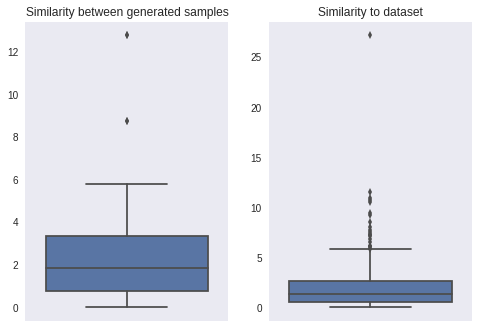

In [75]:
plot_similarity('../music/lstm3_128_50_chopin/', '/home/bartek/Datasets/chopin/', n=25, save=True)

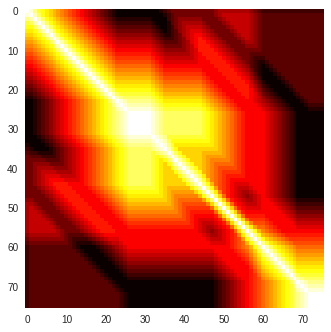

In [87]:
p = midi_path_to_pianoroll('../music/lstm3_128_50_chopin/sample_100000.midi')
h = compare_pianorolls(p, p, n=25)
plt.imshow(h, cmap='hot', interpolation='nearest')
plt.show()

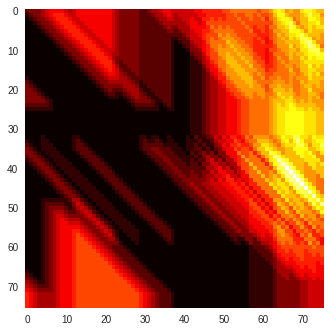

In [90]:
p1 = midi_path_to_pianoroll('../music/lstm3_128_50_chopin/sample_100000.midi')
p2 = midi_path_to_pianoroll('../music/lstm3_128_50_chopin/sample_200000.midi')
h = compare_pianorolls(p1, p2, n=25)
plt.imshow(h, cmap='hot', interpolation='nearest')
plt.show()

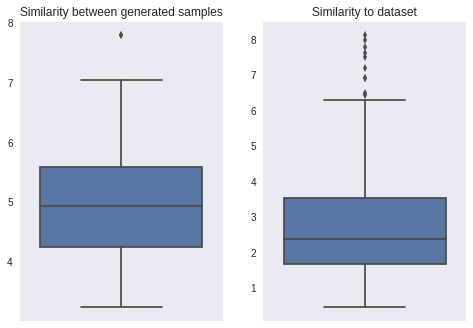

In [95]:
plot_similarity('../music/lstm3_128_1_chopin/generated/', '/home/bartek/Datasets/chopin/', n=25, save=True)

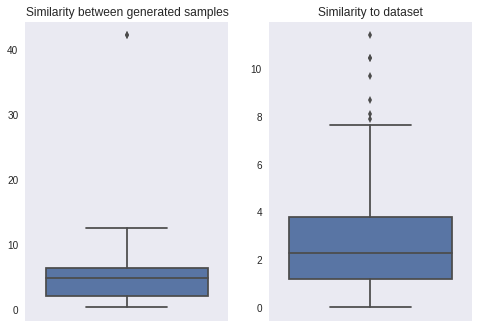

In [141]:
plot_similarity('../music/lstm3_128_50_chopin/generated', '/home/bartek/Datasets/chopin/', n=25, save=True)

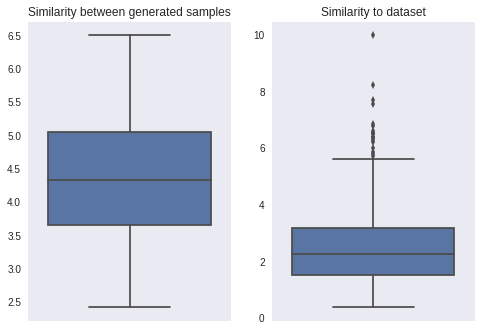

In [96]:
plot_similarity('../music/lstm3_128_2_chopin/generated/', '/home/bartek/Datasets/chopin/', n=25, save=True)

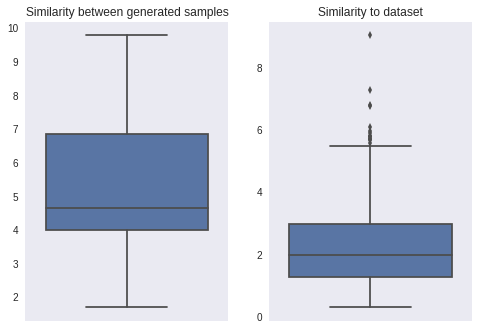

In [97]:
plot_similarity('../music/gru3_128_50_chopin/generated/', '/home/bartek/Datasets/chopin/', n=25, save=True)

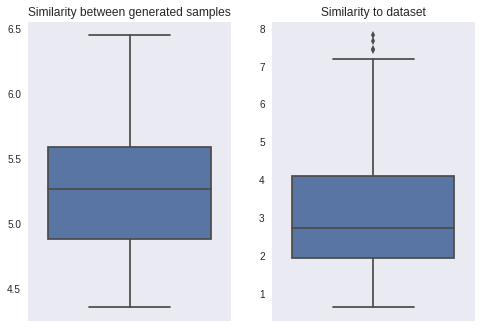

In [98]:
plot_similarity('../music/lstm3_128_50_sgd_chopin/generated/', '/home/bartek/Datasets/chopin/', n=25, save=True)

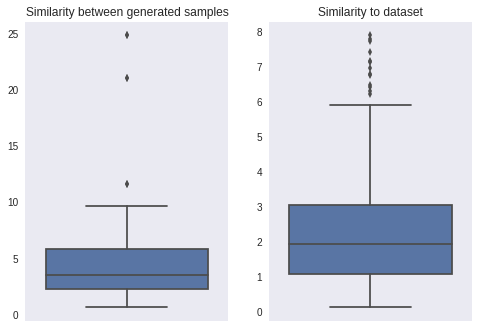

In [100]:
plot_similarity('../music/lstm3_32_50_chopin/generated', '/home/bartek/Datasets/chopin/', n=25, save=True)

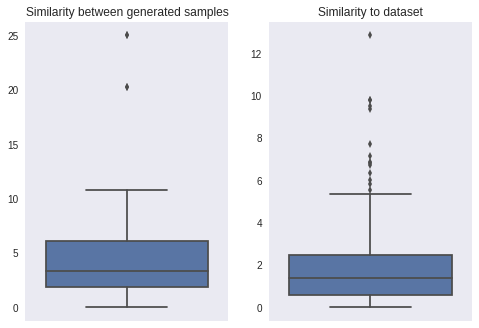

In [140]:
plot_similarity('../music/lstm3_128_50_512_chopin/generated', '/home/bartek/Datasets/chopin/', n=25, save=True)

# Pianoroll Plots

### seq len

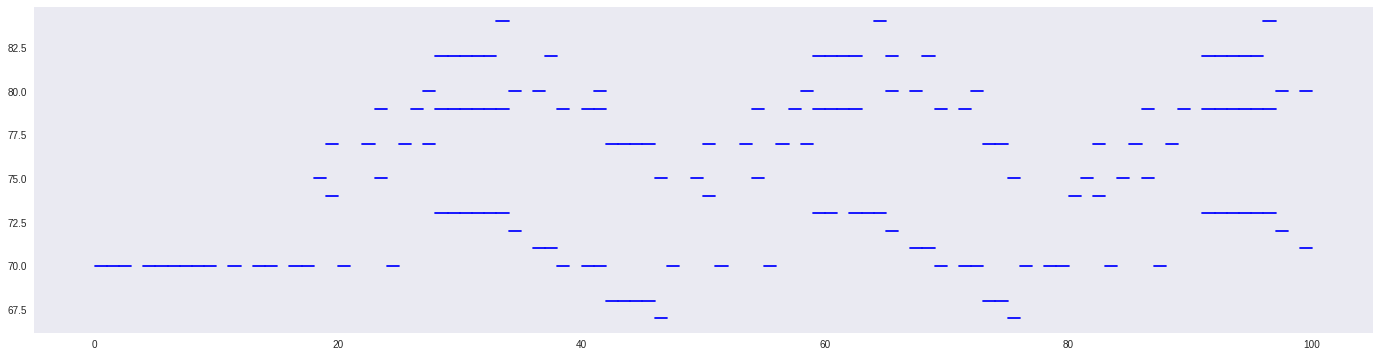

In [137]:
# reference

plt.figure(figsize=(24, 6))
original_pr = midi_path_to_pianoroll('/home/bartek/Datasets/chopin/chp_op18.mid', fs=5)
for i in range(100):
    notes = np.nonzero(original_pr[:, i])[0]
    
    for note in notes:
        plt.plot([i, i+1], [note, note], color='blue')

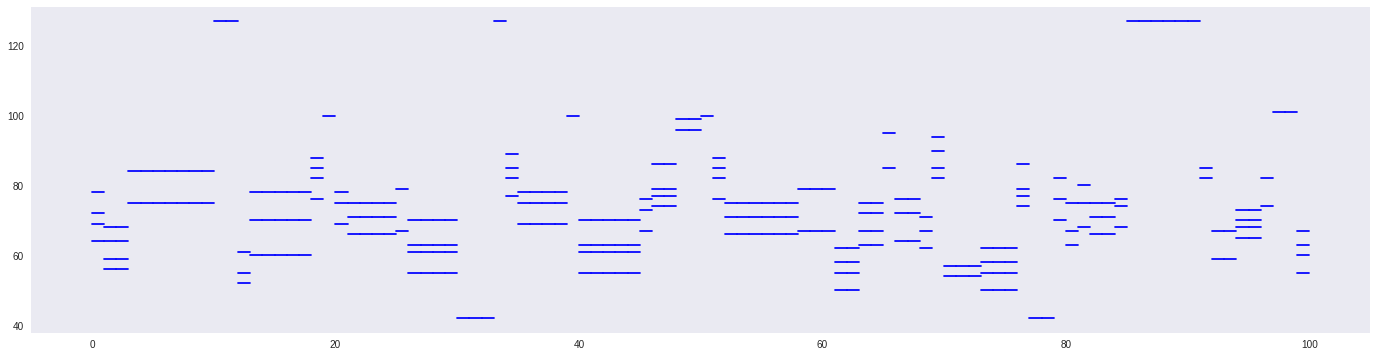

In [111]:
plt.figure(figsize=(24, 6))
original_pr = midi_path_to_pianoroll('../music/lstm3_128_1_chopin/generated/sample_2.midi', fs=5)
for i in range(100):
    notes = np.nonzero(original_pr[:, i])[0]
    
    for note in notes:
        plt.plot([i, i+1], [note, note], color='blue')

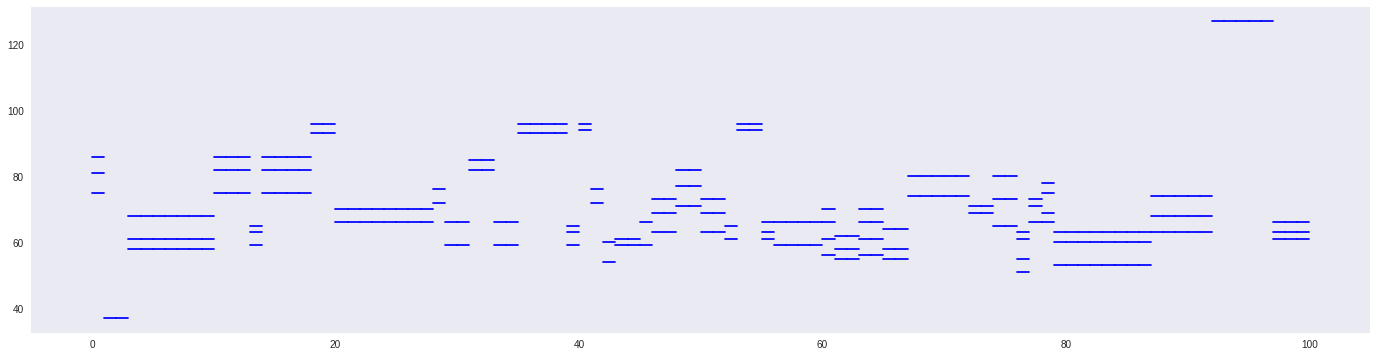

In [122]:
plt.figure(figsize=(24, 6))
original_pr = midi_path_to_pianoroll('../music/lstm3_128_2_chopin/generated/sample_5.midi', fs=5)
for i in range(100):
    notes = np.nonzero(original_pr[:, i])[0]
    
    for note in notes:
        plt.plot([i, i+1], [note, note], color='blue')

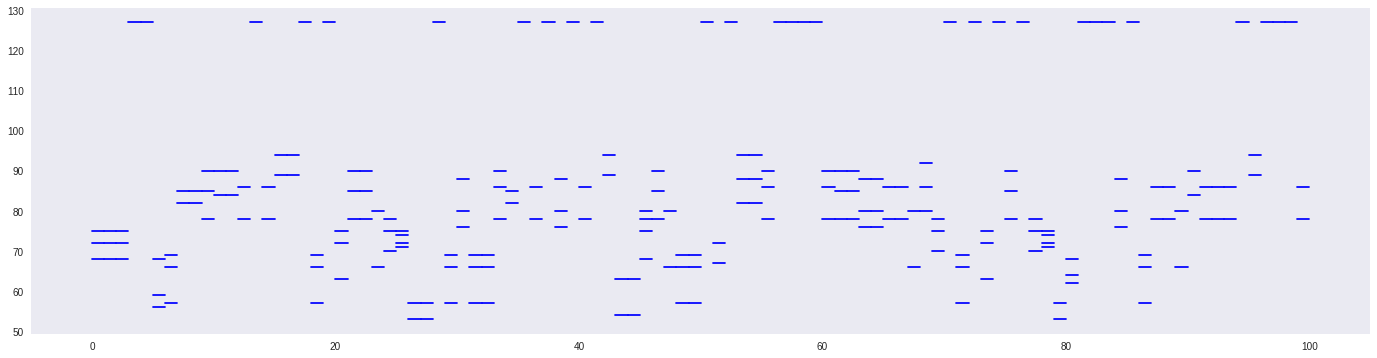

In [143]:
plt.figure(figsize=(24, 6))
original_pr = midi_path_to_pianoroll('../music/lstm3_128_50_chopin/generated/sample_3.midi', fs=5)
for i in range(100):
    notes = np.nonzero(original_pr[:, i])[0]
    
    for note in notes:
        plt.plot([i, i+1], [note, note], color='blue')